### Import Libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
import cmc as cmc

### Data Cleaning

In [62]:
df = pd.read_csv("winequality-red.csv")

In [63]:
df.columns = df.columns.str.replace(" ","_",regex=False)
# df.columns.str is a string accesor, this allows you to access the elements in a column and then apply operations to them

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Using the.info() method we can see that we have no missing data

In [65]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Visualizations

In [66]:
df_quality = pd.DataFrame(df['quality'].value_counts()).reset_index()
df_quality=df_quality.rename(columns={'index':'quality','quality':'count'})
df_quality

,quality,count
0,5,681
1,6,638
2,7,199
3,4,53
4,8,18
5,3,10


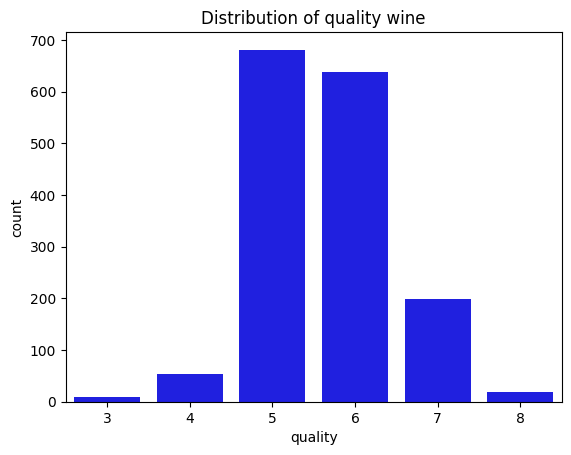

In [67]:
sns.barplot(data=df_quality,x='quality',y='count',color='blue')
plt.title('Distribution of quality wine')
plt.show()

The graph shows us that most of the wine are rated as as 5 or 6.

### Good vs Poor Wine

We need to classify what is a good wine versus a poor wine. The simpliest way to do this is to set criteria using the "quality" feature.
We can classify good wines with anything with a "quality" rating of 7 and above. We essentially created a binary output for our model. We can set "1" as good wine and "0" as a poor wine.

In [68]:
df['recommend'] = [0 if x >= 7 else 1 for x in df['quality']]

In [69]:
df.drop(columns='quality',inplace=True)

In [70]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,recommend
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


### Decision Tree

Split the data into features and target variable

In [71]:
features_col = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Make sure to remove the "quality" column or else the model will be overfitted since using the "quality" column will not properly train the model.
# We are essentially creating a binary rating system for the wine. Using the "quality" feature will be cheating.

In [72]:
X = df[features_col]
y = df['recommend']

In [73]:
print('feature vectors -->')
print(f'rows, cols: {X.shape}')
print(f'num of rows: {X.shape[0]}')
print('')
print('label vector -->')
print(f'rows,: {y.shape}')
print(f'num of rows: {y.shape[0]}')

feature vectors -->
rows, cols: (1599, 11)
num of rows: 1599

label vector -->
rows,: (1599,)
num of rows: 1599


### Splitting the Data

We will assign 20% of the data as test data and the remaining 80% will serve as our train data. We will use the random_state parameter to select the data randomly when testting. Seeding this value will ensure reproducability. Seeding in this context means that if you use the same seeding number on the parameter, the function will produce the same random numbers each time you ran the code/program. 

In [74]:
# assign test data 20% of the the sample
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=56)

Decision trees are not sensitive to variances in the data therefore we do no need to scale or normalize the features.

### Build the model

In [75]:
# create an instance of the dt classifier
decision_tree_classifier = DecisionTreeClassifier()

# train the dt classifier using our training data
decision_tree_classifier.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

### Make predictions based on the trained model

In [76]:
predicted_labels = decision_tree_classifier.predict(X=X_test)

### Evaluate the accuracy of the model

In [77]:
# Compare the testing labels with the predicted labels
dcl_accuracy = metrics.accuracy_score(y_true = y_test, y_pred=predicted_labels, normalize=True)

print(f"Accuracy:{dcl_accuracy} ")

Accuracy:0.865625 


### Visualize decision trees

[Text(0.3813434829059829, 0.9642857142857143, 'alcohol <= 10.775\ngini = 0.236\nsamples = 1279\nvalue = [175, 1104]'),
 Text(0.12259615384615384, 0.8928571428571429, 'sulphates <= 0.645\ngini = 0.089\nsamples = 834\nvalue = [39, 795]'),
 Text(0.042735042735042736, 0.8214285714285714, 'free_sulfur_dioxide <= 13.5\ngini = 0.025\nsamples = 547\nvalue = [7, 540]'),
 Text(0.03418803418803419, 0.75, 'free_sulfur_dioxide <= 11.5\ngini = 0.052\nsamples = 261\nvalue = [7, 254]'),
 Text(0.017094017094017096, 0.6785714285714286, 'free_sulfur_dioxide <= 8.5\ngini = 0.019\nsamples = 204\nvalue = [2, 202]'),
 Text(0.008547008547008548, 0.6071428571428571, 'gini = 0.0\nsamples = 139\nvalue = [0, 139]'),
 Text(0.02564102564102564, 0.6071428571428571, 'total_sulfur_dioxide <= 18.5\ngini = 0.06\nsamples = 65\nvalue = [2, 63]'),
 Text(0.017094017094017096, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03418803418803419, 0.5357142857142857, 'fixed_acidity <= 9.7\ngini = 0.031\nsa

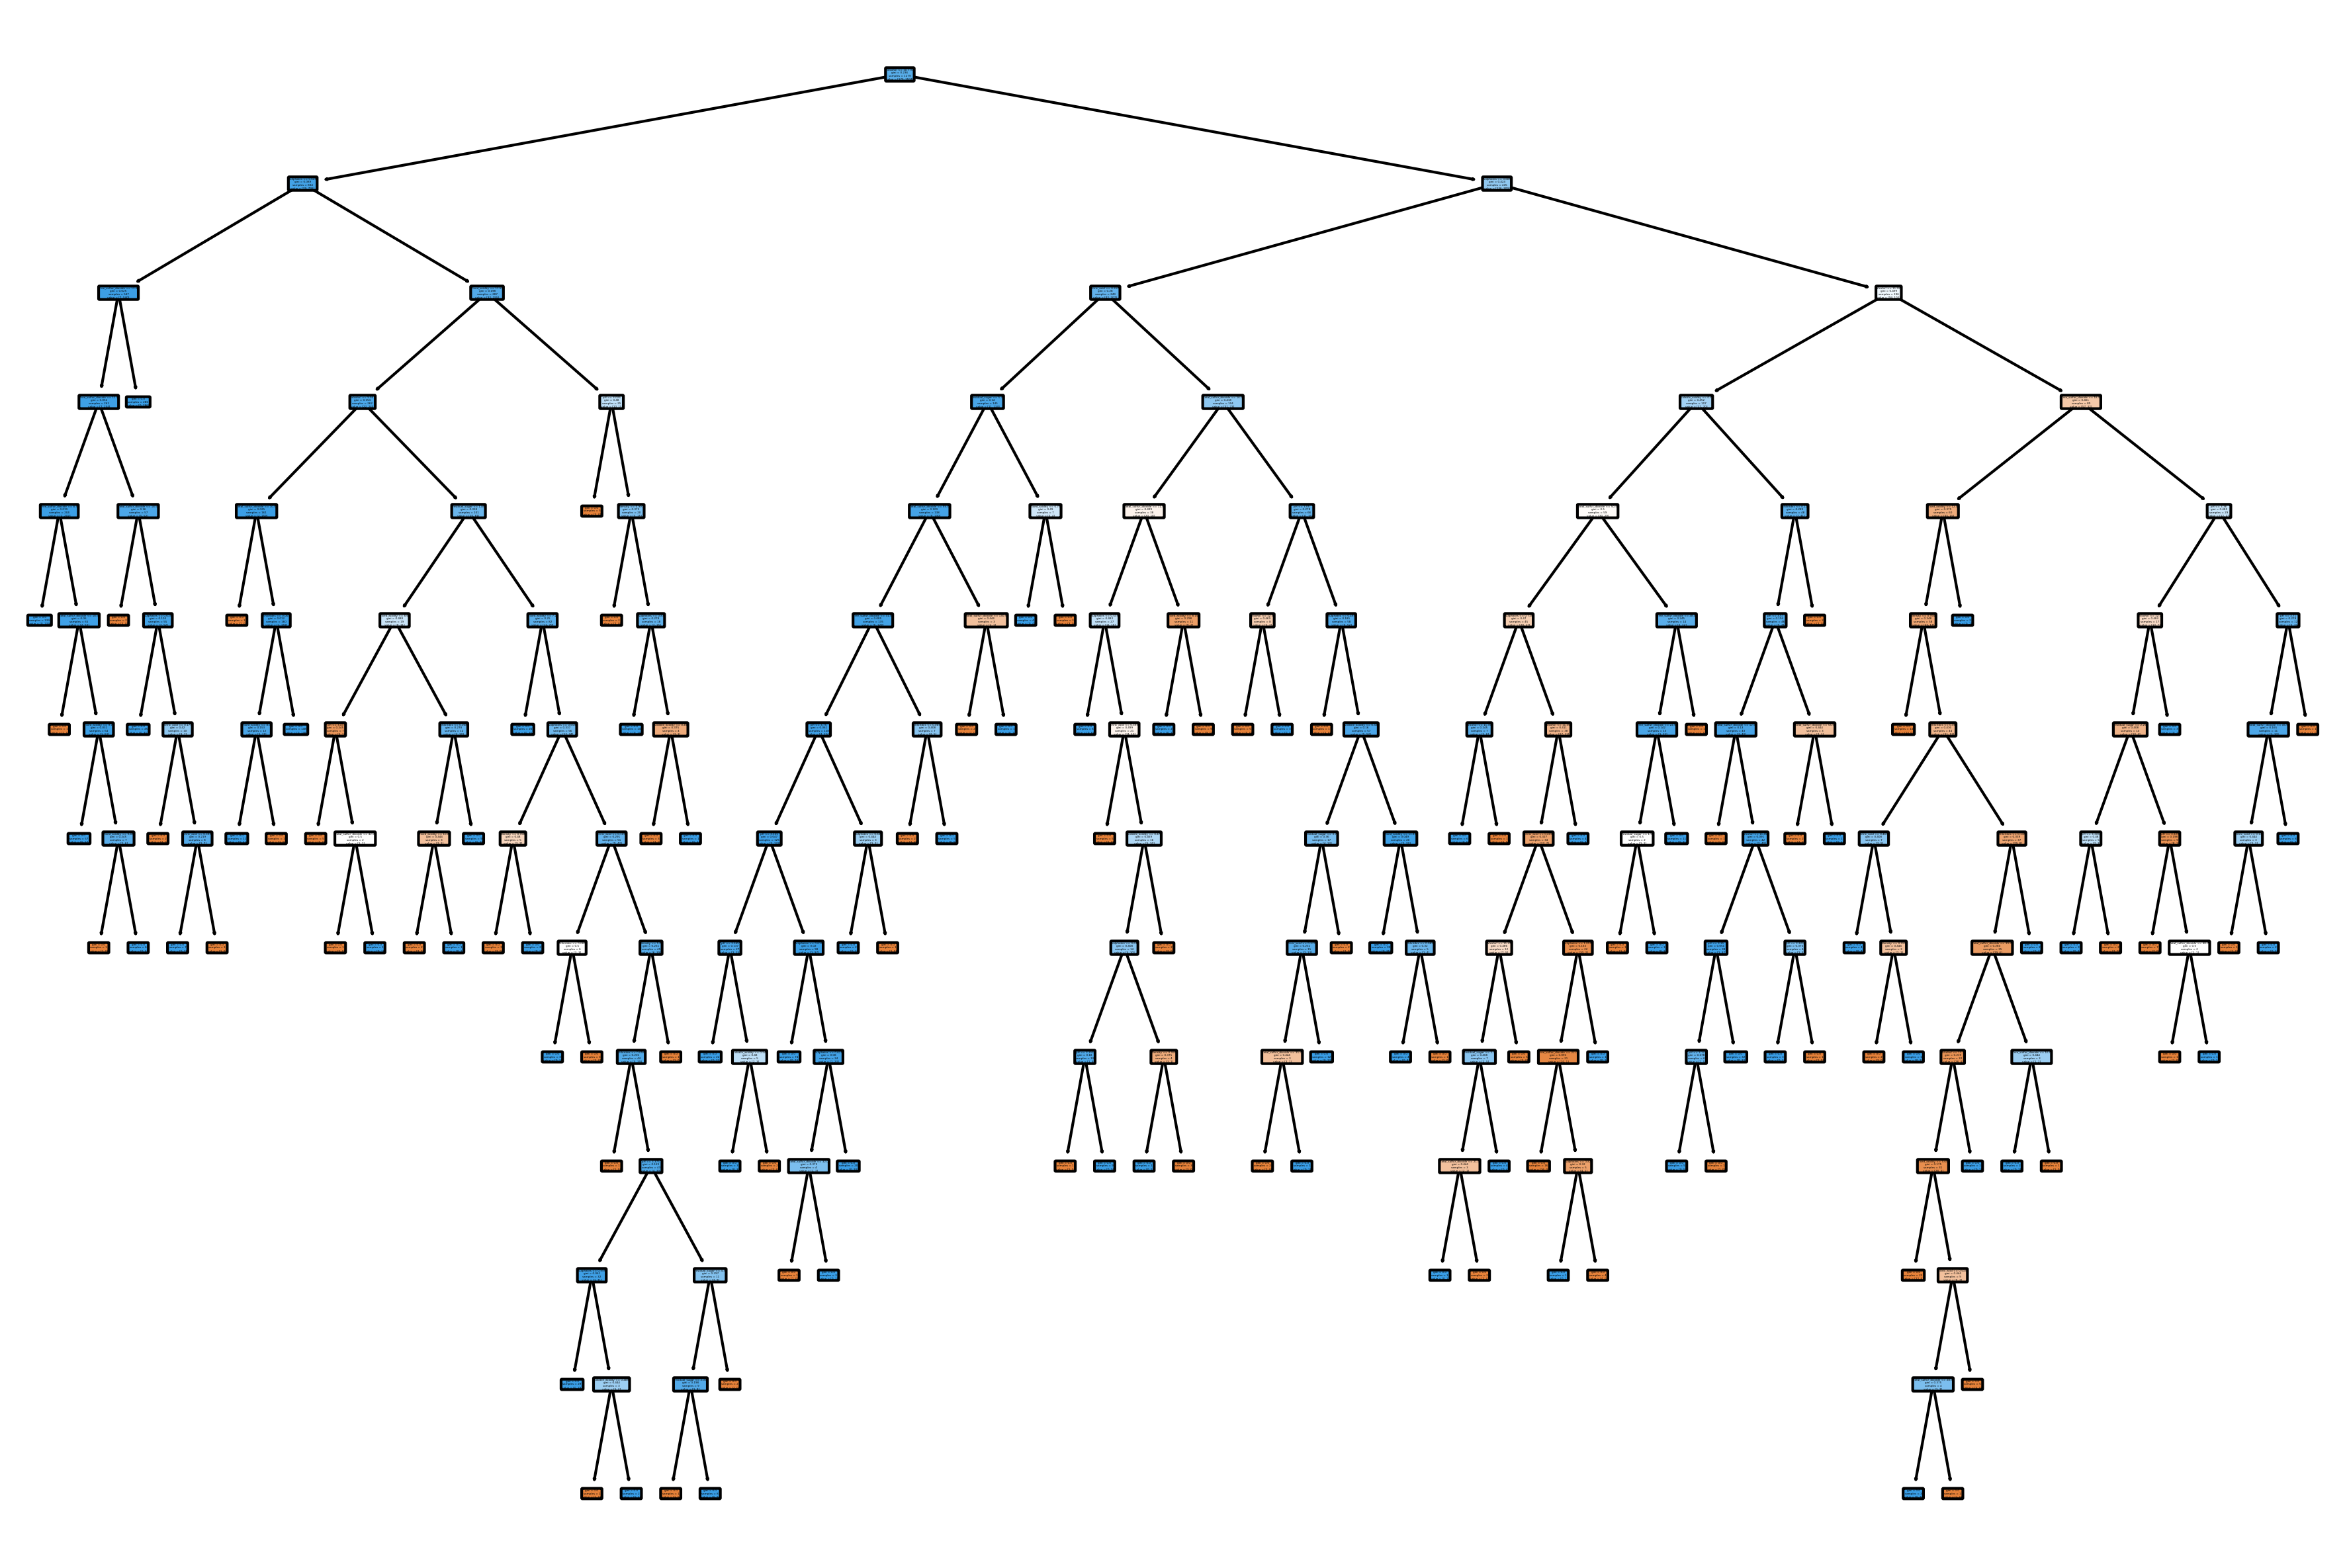

In [78]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10),dpi=300)
plot_tree(decision_tree_classifier,feature_names=features_col, filled=True, rounded=True)

In [79]:
# depth of the model
decision_tree_classifier.get_depth()
print(f'The depth of the tree is {decision_tree_classifier.get_depth()}.')

The depth of the tree is 13.


We created a complex tree with more than 10 levels. We will tweak the model to see if we can gain or retrain accuracy while reducing the complexity.

In [80]:
# create an instance of the dt classifier
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy",max_depth=3)

# train the dt classifier using our training data
decision_tree_classifier.fit(X=X_train,y=y_train)

# Create predictions using the model
predicted_labels = decision_tree_classifier.predict(X=X_test)

# Compare the testing labels with the predicted labels
dcl_accuracy = metrics.accuracy_score(y_true = y_test, y_pred=predicted_labels, normalize=True)

print(f"Accuracy:{dcl_accuracy} ")



Accuracy:0.9 


[Text(0.5, 0.875, 'alcohol <= 10.45\nentropy = 0.576\nsamples = 1279\nvalue = [175, 1104]'),
 Text(0.25, 0.625, 'sulphates <= 0.615\nentropy = 0.201\nsamples = 733\nvalue = [23, 710]'),
 Text(0.125, 0.375, 'sulphates <= 0.565\nentropy = 0.044\nsamples = 413\nvalue = [2, 411]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 277\nvalue = [0, 277]'),
 Text(0.1875, 0.125, 'entropy = 0.111\nsamples = 136\nvalue = [2, 134]'),
 Text(0.375, 0.375, 'fixed_acidity <= 11.55\nentropy = 0.349\nsamples = 320\nvalue = [21, 299]'),
 Text(0.3125, 0.125, 'entropy = 0.261\nsamples = 295\nvalue = [13, 282]'),
 Text(0.4375, 0.125, 'entropy = 0.904\nsamples = 25\nvalue = [8, 17]'),
 Text(0.75, 0.625, 'sulphates <= 0.675\nentropy = 0.853\nsamples = 546\nvalue = [152, 394]'),
 Text(0.625, 0.375, 'pH <= 3.285\nentropy = 0.598\nsamples = 289\nvalue = [42, 247]'),
 Text(0.5625, 0.125, 'entropy = 0.865\nsamples = 94\nvalue = [27, 67]'),
 Text(0.6875, 0.125, 'entropy = 0.391\nsamples = 195\nvalue = [15, 180]'),
 

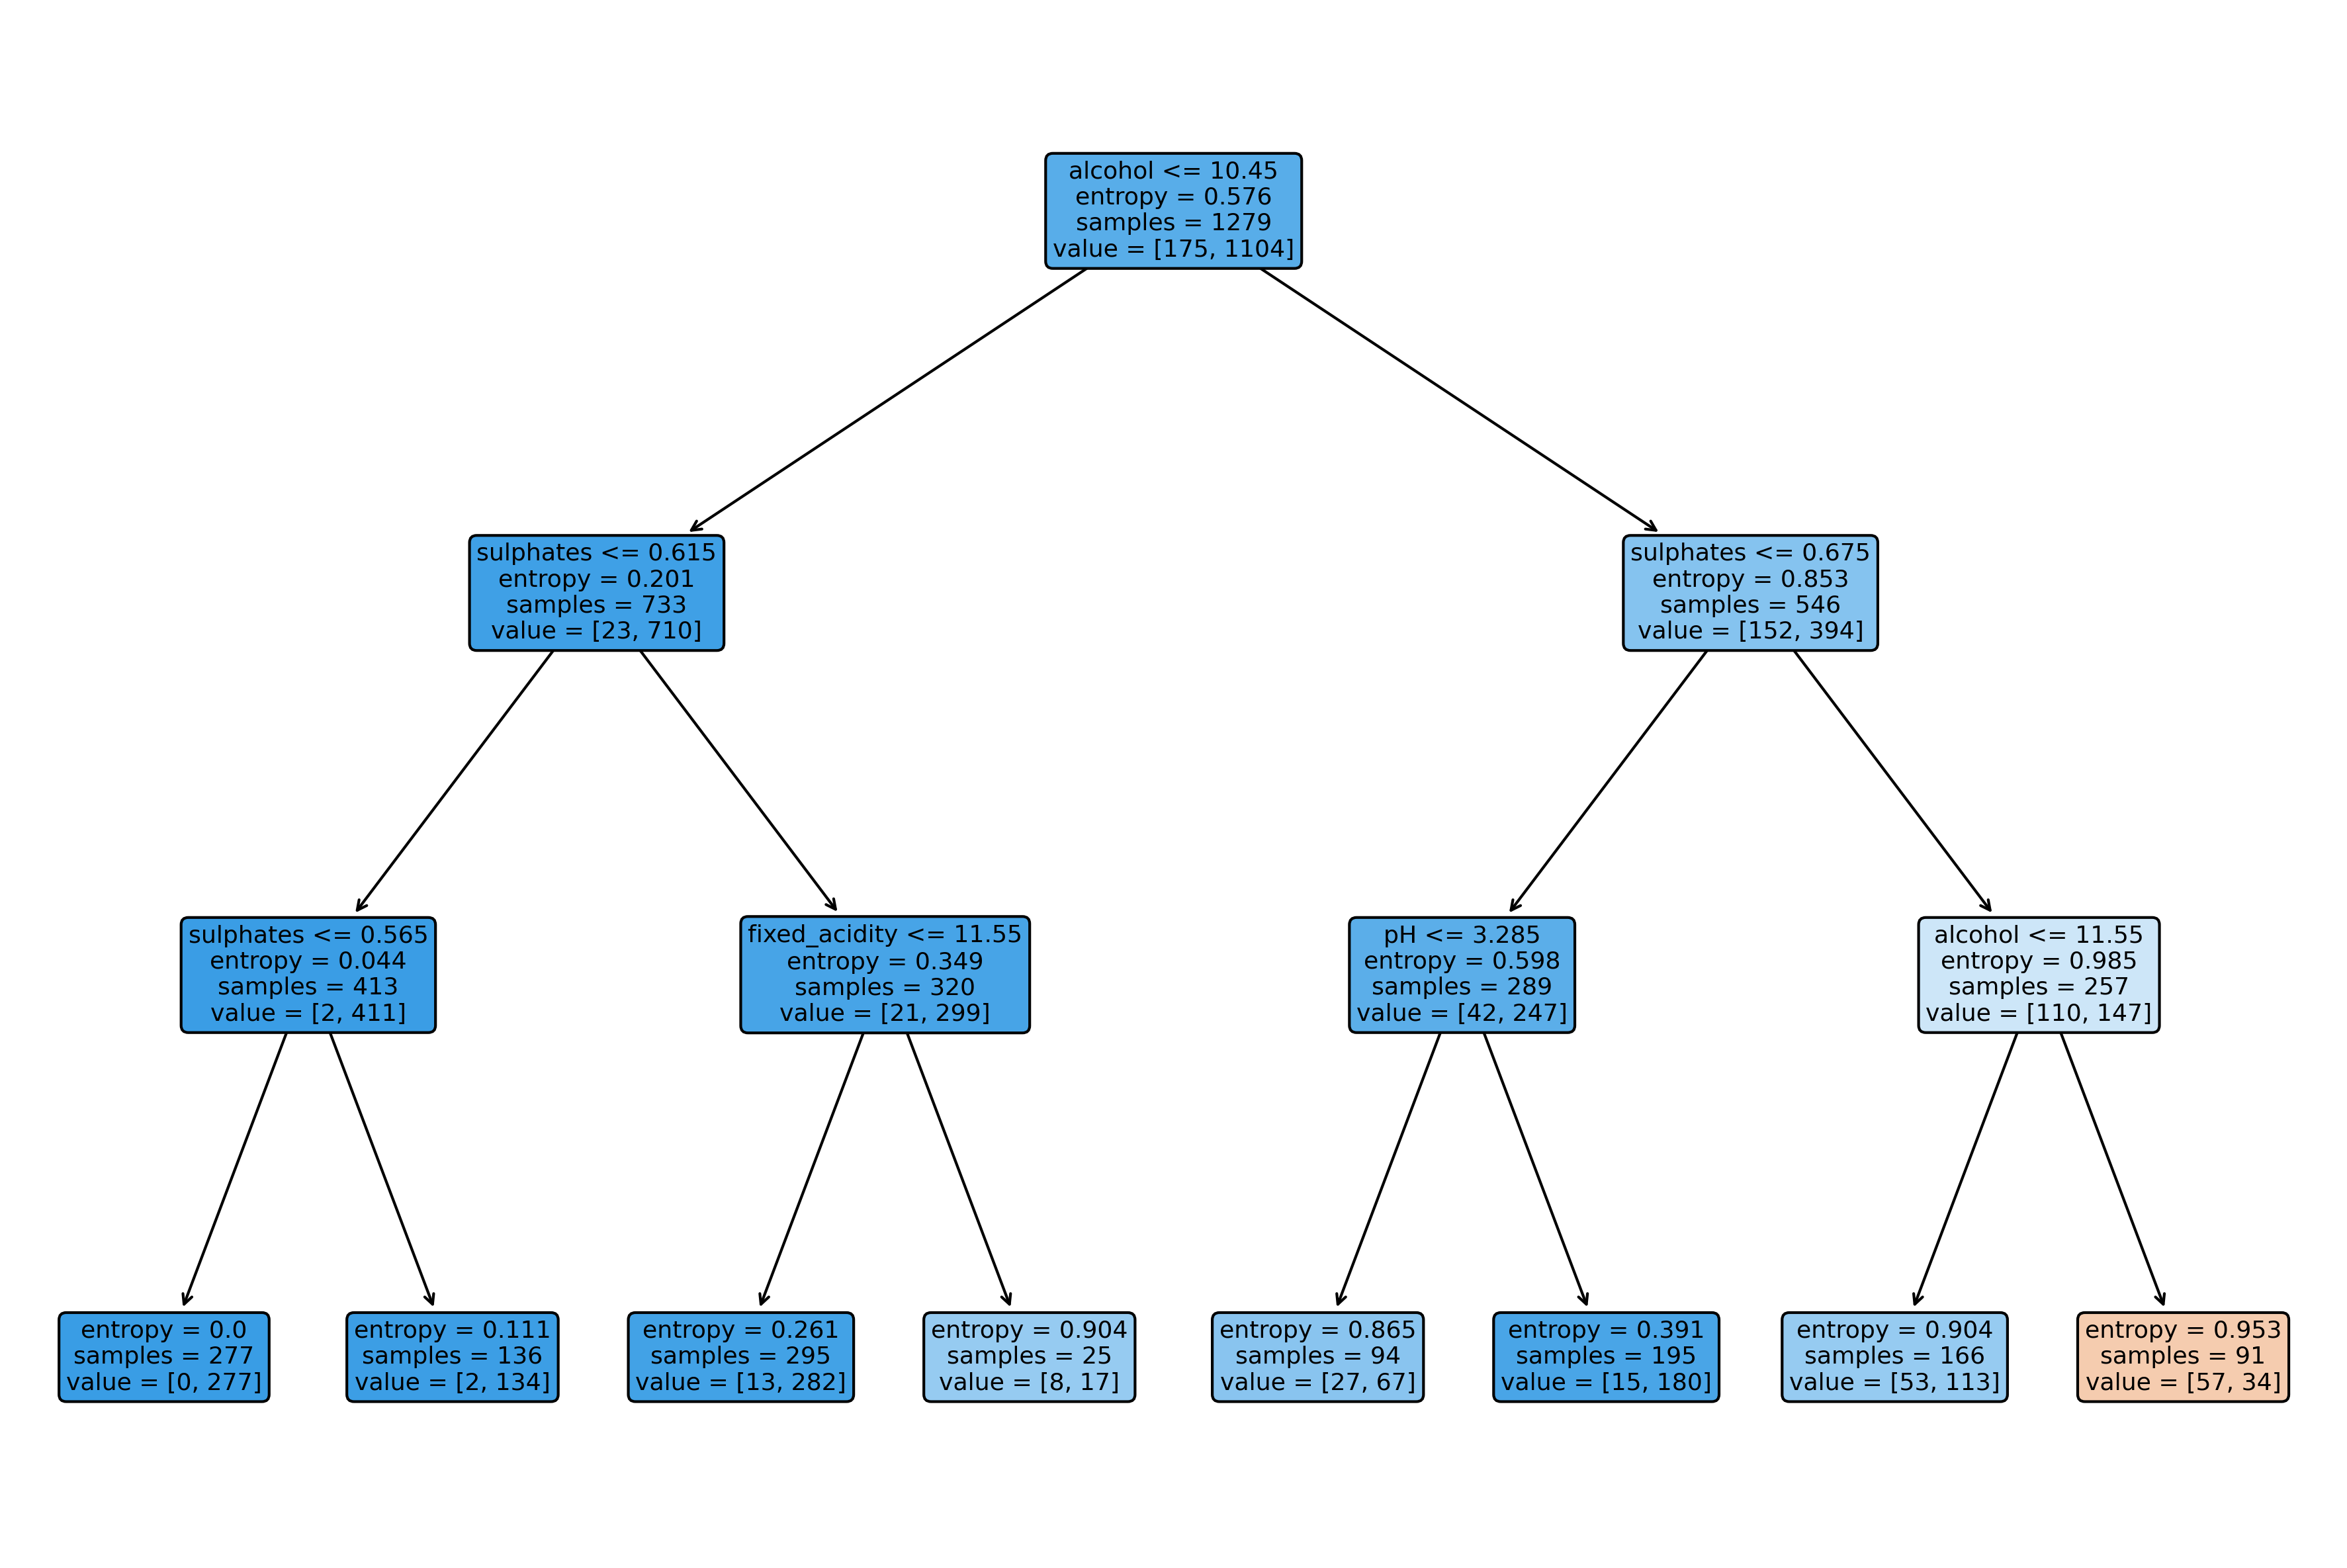

In [81]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10),dpi=300)
plot_tree(decision_tree_classifier,feature_names=features_col, filled=True, rounded=True)

In [82]:
y_test.value_counts()

1    278
0     42
Name: recommend, dtype: int64

### Confusion Matrix

In [83]:
metrics.confusion_matrix(y_true=y_test, y_pred=predicted_labels)

array([[ 18,  24],
       [  8, 270]], dtype=int64)

In [84]:
TP = metrics.confusion_matrix(y_test, predicted_labels)[0,0]
TN = metrics.confusion_matrix(y_test, predicted_labels)[1,1]
FN = metrics.confusion_matrix(y_test, predicted_labels)[0,1]
FP = metrics.confusion_matrix(y_test, predicted_labels)[1,0]
total_pred = TP+TN+FP+FN 
print(f"TP = {TP}\nFP = {FP}\nTN = {TN}\nFN = {FN}")

TP = 18
FP = 8
TN = 270
FN = 24


In [85]:
cnf_matrix = metrics.confusion_matrix(y_test, predicted_labels)
fig = ff.create_annotated_heatmap(cnf_matrix[::-1],x=['Positive', 'Negative'],y=['Negative','Postive'])
fig.update_layout(xaxis_title='Predicted Value',yaxis_title = 'Expected Value')
fig.show()

### Accuracy

In [86]:
print(f"The decision tree has an accuracy score of {dcl_accuracy}")

The decision tree has an accuracy score of 0.9


In [87]:
cmc.accuracy_score(TP=TP, TN=TN, total_predictions=total_pred)

The accuracy of the model is 0.9


In the context of classification models and confusion matrix, accuracy refers to how many correct predictions did the model predict. Accuracy is measured on how often did the model correctly predict the positives and the negatives. We can calculate the accuracy score using the true positive plus the true negatives and divide that sum by the total predictions made. 

We can think of accuracy similar to how a student would score on a test. How many questions did the student get correct.The limitation of accuracy score is that it ignores the importance of the different classs.

If the data set has an imbalanced distribution, a closer inspection of the accuracy score should be conducted. If the accuracy score mirrors the distribution of the classes in the data set, a closer inspection of the accuracy score should be conducted. You don not want your data to just be a "majority" class classifier.

### Recall

In [88]:
cmc.recall(TP=TP, FN=FN)

The recall of the model is 0.42857142857142855


Recall hones in on the models Positive predictions. Recall hones in on how well the model identified one class, in this case how well it predicted the true positives from its positives predictions. 

You can think of recall as a self assesment on its positive predictions. Note that its positive predictions compose of TP and FN.

We can think of the recall score similar to a fishing net. A fishing net is used to catch fish. You throw the net into the water and when you pull the net back, you will catch fish and the unexpected crabs or other sea creatures. This is an analogy for recall. Think of recall score as how many fishes were captured out of all the total fish and creatures IN THE NET.

In our red wine example, we study recall by looking at its positive predictions. We look at the true positive and then the false negative. Remember that false negatives are the ones that are actually positive. In our red wine analysis, the model correctly identified 18 good wines from a total of 42 good wines. 

We have a very low recall score. This means that the model is not great at predicting good wines

### Specificty

In [89]:
cmc.specificity(TN=TN, FP=FP)

The specificity of the model is 0.9712230215827338


Specificity hones in on the True Negative predictions. Similar to Recall this metric focuses on one class, and that is the negative predictions.

In our red wine scenario, the model predicted 270 bad wines from a total of 278 bad wines. 

We can think of specificity similar to the net analogy but the focus on the on the true negatives.

We have a specificity score of .97 and this means that our model is good at predicting the majority class which are the negatives

### Precision

In [90]:
cmc.precision(TP=TP,FP=FP)

The precision of the model is 0.6923076923076923


Precision deals with the models positive predictions. This is another form of self assesment and looks at what the model predicted to be true. This is looking at the true positive and false positive predictions. In other words, out of all the positive predictions that the model made how many were actually correct.

This is different from recall because recall looks at at the fish in the net vs the total fish in the pond. Precision just looks at the fish in the net. How many fishes are in the net vs the total things caught in the net. 


### Model Conclusion

The decision tree model has a low precision and low recall score eventhough it has a very high accuracy model.

## Pruning and fine tuning the model

We can use GridSearchCV to help us determine the best parameters for our decision tree model.

The first thing we need to do is create a dictionary of our parameters.

In [96]:
# dictionary for decision tree parameters

search_space = {
    "criterion":["gini", "entropy"],
    "splitter":['best', 'random'],
    "max_depth":[3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,29],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

In [98]:
# instantiate gridsearch
grid_search = GridSearchCV(estimator=decision_tree_classifier,param_grid=search_space)

#fit the model
grid_search.fit(X_train,y_train)

c:\Users\dorna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


2240 fits failed out of a total of 44800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dorna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dorna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\dorna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_class

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 29],
                         'splitter': ['best', 'random']})

In [99]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'splitter': 'random'}

Now that we have found the "best" parameters for our model , we will fine tune the model using these parameters

In [100]:
# create an instance of the dt classifier
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy',
    max_depth= 6,
    min_samples_leaf = 5,
    min_samples_split = 8,
    splitter = 'random')

# train the dt classifier using our training data
decision_tree_classifier.fit(X=X_train,y=y_train)

# Create predictions using the model
predicted_labels = decision_tree_classifier.predict(X=X_test)

# Compare the testing labels with the predicted labels
dcl_accuracy = metrics.accuracy_score(y_true = y_test, y_pred=predicted_labels, normalize=True)

metrics.confusion_matrix(y_true=y_test, y_pred=predicted_labels)
TP = metrics.confusion_matrix(y_test, predicted_labels)[0,0]
TN = metrics.confusion_matrix(y_test, predicted_labels)[1,1]
FN = metrics.confusion_matrix(y_test, predicted_labels)[0,1]
FP = metrics.confusion_matrix(y_test, predicted_labels)[1,0]
total_pred = TP+TN+FP+FN 
print(f"TP = {TP}\nFP = {FP}\nTN = {TN}\nFN = {FN}")

print(f"Accuracy:{dcl_accuracy} ")
cmc.accuracy_score(TP=TP, TN=TN, total_predictions=total_pred)
cmc.recall(TP=TP, FN=FN)
cmc.specificity(TN=TN, FP=FP)
cmc.precision(TP=TP,FP=FP)


TP = 15
FP = 9
TN = 269
FN = 27
Accuracy:0.8875 
The accuracy of the model is 0.8875
The recall of the model is 0.35714285714285715
The specificity of the model is 0.9676258992805755
The precision of the model is 0.625
